In [615]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [616]:
d = pd.read_csv("./data_assignment2.csv")

# remove outliers
old_data = d.copy()
d = d.drop(d.index[[45, 40, 24, 9]])
d.head(5)

,ID,Living_area,Rooms,Land_size,Biarea,Age,Selling_price
0,1,104,5.0,271.0,25.0,33,4600000
1,2,99,5.0,1506.0,6.0,88,4450000
2,3,133,6.0,486.0,NaN,44,4900000
3,4,175,7.0,728.0,NaN,14,6625000
4,5,118,6.0,1506.0,NaN,29,4600000


Text(0, 0.5, 'Selling price')

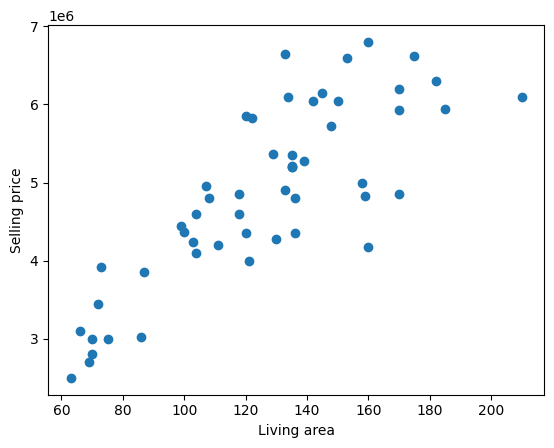

In [617]:
x,y = d['Living_area'], d['Selling_price']
x_not_cleaned,y_not_cleaned = old_data['Living_area'], old_data['Selling_price']
plt.scatter(x,y)
plt.xlabel('Living area')
plt.ylabel('Selling price')

**1a) Find a linear regression model that relates the living area to the selling price.**
**If you did any data cleaning step(s), describe what you did and explain why**

In [618]:
x, y = list(x), list(y)
slope, intercept, r, p, std_err = stats.linregress(x, y)

# Data that hasn't been cleaned
x_not, y_not = list(x_not_cleaned), list(y_not_cleaned)
slope_not, intercept_not, r_not, p_not, std_not = stats.linregress(x_not, y_not)

# Regression function
def regression(x):
    return slope * x + intercept


print(f'Without cleaning the score was {round(r_not, 3)}, after manual cleaning the score was {round(r, 3)}')



Without cleaning the score was 0.562, after manual cleaning the score was 0.817


The correlation value was <mark>0.56</mark> in the original dataset. We plotted the data in a scatter plot, and removed 4 houses that we concidered not representative for the rest of the houses. For example, we had a newly built house that were way more expensive than the rest. The high price most likley did not occur because of the living area. When we removed the outliers the correlation value increased to <mark>0.82</mark>, greatly improving the model.

**1b) What are the values of the slope and intercept of the regression line?** 

In [614]:
print(f'The slope is = {round(slope, 2)} kr/m2')
print(f'The intercept is = {round(intercept, 2)} kr')


The slope is = 26686.12 kr/m2
The intercept is = 1504030.05 kr


**1c) Use this model to predict the selling prices of houses which have living area**
**100 m2, 150 m2 and 200 m2**

In [619]:
#100m2 selling price
a = regression(100)
print(f'100m2 predicted selling price: {int(a)} kr')
#150m2 selling price
a = regression(150)
print(f'150m2 predicted selling price: {int(a)} kr')
#200m2 selling price
a = regression(200)
print(f'200m2 predicted selling price: {int(a)} kr')

100m2 predicted selling price: 4172642 kr
150m2 predicted selling price: 5506948 kr
200m2 predicted selling price: 6841254 kr


**1d) Draw a residual plot.** 

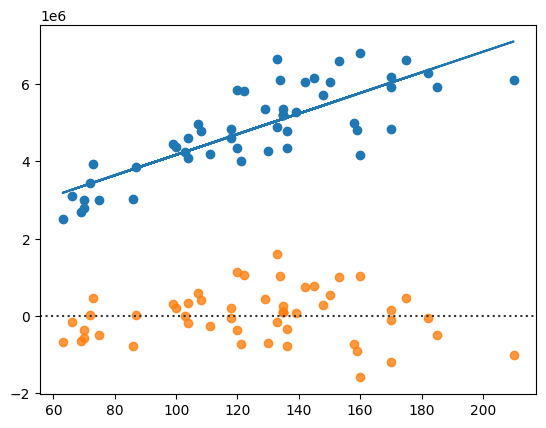

In [620]:
model = list(map(regression, x))
plt.scatter(x, y)
plt.plot(x, model)
sns.residplot(x=x, y=y, data=d)
plt.show()

**2a) Use a confusion matrix to evaluate the use of logistic regression to classify the iris data set**

In [490]:
data = load_iris()
# data

In [491]:
# make a logistic regresson
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target)
clf = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear').fit(x_train, y_train)
clf.predict(x_test[0].reshape(1,-1))
score = clf.score(x_test, y_test)

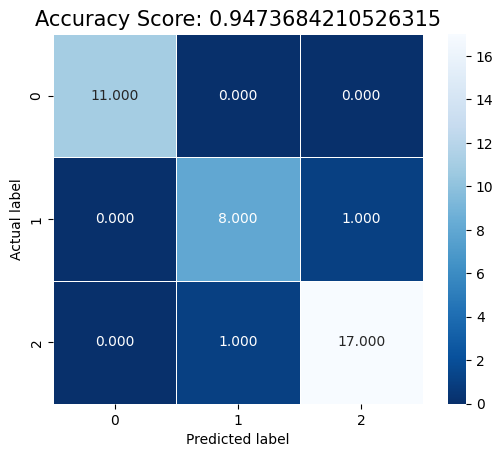

In [492]:
# make a confusion matrix
predictions = clf.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()


**2b) Use k-nearest neighbours to classify the iris data set with some different**
**values for k, and with uniform and distance-based weights. What will happen** 
**when k grows larger for the different cases? Why?** 

[(1, 0.9567368421052631), (2, 0.9477894736842104), (3, 0.9615), (4, 0.9581842105263157), (5, 0.9614736842105263), (6, 0.9616578947368419), (7, 0.9629999999999999), (8, 0.961921052631579), (9, 0.9654210526315788), (10, 0.9623684210526314), (11, 0.9663684210526314), (12, 0.9629999999999999), (13, 0.9667894736842104), (14, 0.9629736842105261), (15, 0.9664999999999999), (16, 0.9579999999999999), (17, 0.9614999999999999), (18, 0.9555789473684211), (19, 0.9562105263157894)]


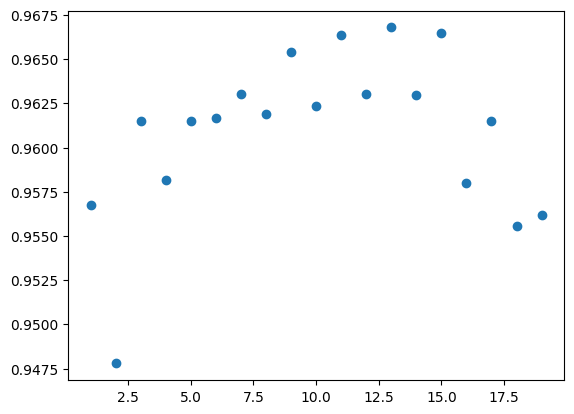

In [547]:
# making a for loop to iterate between diffrent values of k-neighbours, to find the optimal number of neighbours. 

ret_list = []
for i in range(1, 20):
    neigh = KNeighborsClassifier(n_neighbors=i)
    avg_list = []
    for j in range(1000):
        x_train, x_test, y_train, y_test = train_test_split(data.data, data.target)
        neigh.fit(x_train, y_train)
        y_pred = neigh.predict(x_test)
        avg_list.append(metrics.accuracy_score(y_test, y_pred))
    ret_list.append((i, np.mean(avg_list)))

print(ret_list)

# plotting the data 

x_vals = [x for (x, y) in ret_list]
y_vals = [y for (x, y) in ret_list]

plt.scatter(x_vals, y_vals)
plt.show()




Answer: We have iterated through diffrent values for k. We started from 1 to 100 and saw that the accuracy dropped dramatically at around k=60. We saw that the most accurate values was in the interval 1-20 and chose to run iterate through this intervall with many repetitions (1000 runs) to get a reliable average value. We plotted the values and saw that the odd numbers performed noticably better, and think that is because there always will be more of one type of neighbour. If you have a even number it might be a case where you have 4 neighbours of one type and 4 neighbours of another type, and then the model have to choose randomly, thus even numbers reduce the accuracy. 

From this data we chose a k value of 11.

The reason why the accuracy drop as k-grows is beacuse we are underfitting the model.

**2c) Compare the classification models for the iris data set that are generated by** 
**k-nearest neighbours (for the different settings from question b) and by**
**logistic regression. Calculate confusion matrices for these models and discuss** 
**the performance of the various models**

In [611]:
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target)

# k-neighbours 
neigh = KNeighborsClassifier(n_neighbors=11)
neigh.fit(x_train, y_train)

pred_Kn = neigh.predict(x_test)
cm_Kn = metrics.confusion_matrix(y_test, pred_Kn)
score_Kn = metrics.accuracy_score(y_test, pred_Kn)

#logistic regression
clf = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear').fit(x_train, y_train)

pred_lr = clf.predict(x_test)
cm_lr = metrics.confusion_matrix(y_test, pred_lr)
score_lr = clf.score(x_test, y_test)

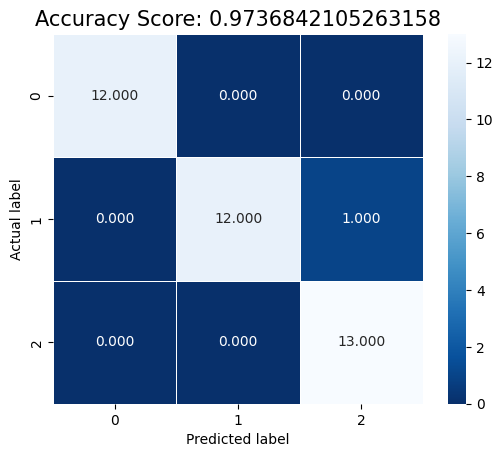

In [612]:
sns.heatmap(cm_lr, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_lr)
plt.title(all_sample_title, size = 15);
plt.show()

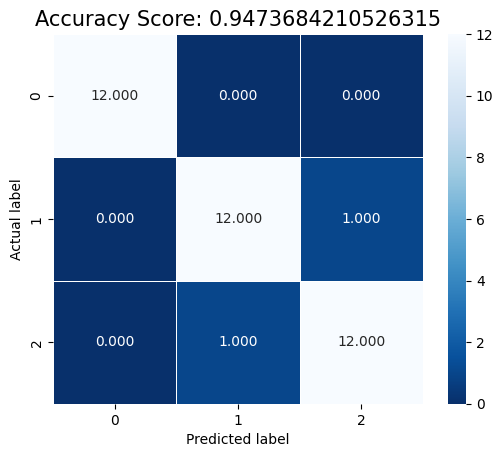

In [613]:
sns.heatmap(cm_Kn, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_Kn)
plt.title(all_sample_title, size = 15);
plt.show()

Answer: The performance is similar for both models. We tested with different data and each time the best performing model varied. With k=11 we found that the k-nearest model had a slight upper hand, being a bit more consistant with the predictions. With higher k the k-nearest model predictions gets exponentially worse. If you are not careful when choosing your k you will get a bad model.

Our conclusion is that the k-neighbors model is slightly more accurate but the linear regression model is easier too use and less likley to be improperly implemented.